In [26]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
df = pd.read_csv("data.csv")
df.head(5)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [28]:
# Show number of matches in dataset before removing matches with missing stance information
print('Number of matches prior to filtering: ' + str(len(df)))

# Remove matches with missing stance information
filter1 = df[df['B_Stance'].notnull()]
filter2 = filter1[filter1['R_Stance'].notnull()]
filter3 = filter2[filter2['Referee'].notnull()]
df = filter3
print('Number of matchs after filtering: ' + str(len(filter3)))

Number of matches prior to filtering: 4865
Number of matchs after filtering: 4865


In [29]:
df.columns[df.isnull().any()]

Index(['B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att',
       'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed',
       'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att',
       'B_avg_HEAD_landed',
       ...
       'R_avg_opp_SUB_ATT', 'R_avg_opp_TD_att', 'R_avg_opp_TD_landed',
       'R_avg_opp_TD_pct', 'R_avg_opp_TOTAL_STR_att',
       'R_avg_opp_TOTAL_STR_landed', 'R_total_time_fought(seconds)',
       'R_Reach_cms', 'B_age', 'R_age'],
      dtype='object', length=104)

In [30]:
people = df[df['R_age'].isnull()].head(5)
people

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4171,Per Eklund,Samy Schiavo,Leon Roberts,2008-10-18,"Birmingham, England, United Kingdom",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,177.80,182.88,155.0,32.0,NaN
4376,Jess Liaudin,Anthony Torres,Mario Yamasaki,2007-09-08,"London, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,1.0,0.0,1.0,Orthodox,175.26,182.88,170.0,29.0,NaN
4438,Jess Liaudin,Dennis Siver,Steve Mazzagatti,2007-04-21,"Manchester, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,175.26,182.88,170.0,28.0,NaN
4767,Keith Rockel,Chris Liguori,John McCarthy,2003-11-21,"Uncasville, Connecticut, USA",Red,False,Middleweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,182.88,NaN,185.0,NaN,NaN
4908,Ben Earwood,Chris Lytle,Mario Yamasaki,2000-11-17,"Atlantic City, New Jersey, USA",Red,False,Welterweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,172.72,NaN,170.0,26.0,NaN


In [31]:
df['R_age'].median()

29.0

In [32]:
df = df.fillna(df.median())
df.loc[people.index.tolist()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4171,Per Eklund,Samy Schiavo,Leon Roberts,2008-10-18,"Birmingham, England, United Kingdom",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,177.80,182.88,155.0,32.0,29.0
4376,Jess Liaudin,Anthony Torres,Mario Yamasaki,2007-09-08,"London, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,1.0,0.0,1.0,Orthodox,175.26,182.88,170.0,29.0,29.0
4438,Jess Liaudin,Dennis Siver,Steve Mazzagatti,2007-04-21,"Manchester, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,175.26,182.88,170.0,28.0,29.0
4767,Keith Rockel,Chris Liguori,John McCarthy,2003-11-21,"Uncasville, Connecticut, USA",Red,False,Middleweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,182.88,185.42,185.0,29.0,29.0
4908,Ben Earwood,Chris Lytle,Mario Yamasaki,2000-11-17,"Atlantic City, New Jersey, USA",Red,False,Welterweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,172.72,185.42,170.0,26.0,29.0


# Visualizations

In [33]:
#dealing with only the B_fighter and successful attacks landed. Much smaller dataset. 
#reasoning: successful attacks tend are more significatn 
#attacks that were attempted showcase "volume" of that fight which vary match by match
#whereas successfully landed shots showcase a fighter's accuracy/overall control of the match

view = df
#dropping duplicates
newView = view.drop_duplicates(subset = "B_fighter", keep = "first")

newView.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [34]:
view = df[["B_fighter", "weight_class", "R_current_lose_streak", "B_current_win_streak", "B_draw", "B_avg_BODY_landed",
           "B_avg_CLINCH_landed", "B_avg_DISTANCE_landed", "B_avg_GROUND_landed", "B_avg_HEAD_landed", "B_avg_KD", 
           "B_avg_LEG_landed", "B_avg_PASS", "B_avg_REV", "B_avg_SIG_STR_landed", "B_avg_SIG_STR_pct", "B_avg_SUB_ATT", 
           "B_avg_TD_landed", "B_avg_TD_pct", "B_avg_TOTAL_STR_landed", "B_longest_win_streak", "B_losses", 
           "B_avg_opp_BODY_landed", "B_avg_opp_CLINCH_landed", "B_avg_opp_DISTANCE_landed", "B_avg_opp_GROUND_landed", 
           "B_avg_opp_HEAD_landed", "B_avg_opp_KD", "B_avg_opp_LEG_landed", "B_avg_opp_PASS", "B_avg_opp_REV", 
           "B_avg_opp_SIG_STR_landed", "B_avg_opp_SIG_STR_pct", "B_avg_opp_TD_landed", "B_avg_opp_TD_pct",
           "B_avg_opp_TOTAL_STR_landed", "B_total_title_bouts", "B_win_by_Decision_Majority", "B_win_by_Decision_Split", 
           "B_win_by_Decision_Unanimous", "B_win_by_KO/TKO", "B_win_by_Submission", "B_win_by_TKO_Doctor_Stoppage", 
           "B_wins"]]



#dropping duplicates
newView = view.drop_duplicates(subset = "B_fighter", keep = "first")

newView.head()

,B_fighter,weight_class,R_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_landed,B_avg_CLINCH_landed,B_avg_DISTANCE_landed,B_avg_GROUND_landed,B_avg_HEAD_landed,...,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_landed,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins
0,Marlon Moraes,Bantamweight,0.0,4.0,0.0,6.000000,0.000000,20.600000,2.000000,11.200000,...,0.100000,19.200000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0
1,Jessica Eye,Women's Flyweight,0.0,3.0,0.0,9.100000,7.300000,42.100000,1.900000,32.000000,...,0.231000,75.400000,0.0,0.0,2.0,1.0,0.0,0.0,1.0,4.0
2,Donald Cerrone,Lightweight,0.0,3.0,0.0,11.322581,4.387097,38.580645,3.806452,23.258065,...,0.063548,49.774194,1.0,0.0,0.0,7.0,10.0,6.0,0.0,23.0
3,Petr Yan,Bantamweight,1.0,4.0,0.0,14.000000,11.000000,48.750000,10.500000,53.750000,...,0.097500,34.250000,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0
4,Blagoy Ivanov,Heavyweight,1.0,1.0,0.0,14.500000,2.000000,59.500000,0.000000,45.000000,...,0.000000,90.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
filtered_df_female_new  = newView.loc[(newView['weight_class'] == "Women's Bantamweight") | (newView['weight_class'] == "Women's Featherweight") | (newView['weight_class'] == "Women's Featherweight") | (newView['weight_class'] == "Women's Flyweight") | (newView['weight_class'] == "Women's Strawweight")]


In [36]:
filtered_df_male_new  = newView.loc[(newView['weight_class'] == "Bantamweight") | (newView['weight_class'] == "Catch Weight") | (newView['weight_class'] == "Featherweight") | (newView['weight_class'] == "Flyweight") | (newView['weight_class'] == "Heavyweight") | (newView['weight_class'] == "Light Heavyweight") | (newView['weight_class'] == "Lightweight") | (newView['weight_class'] == "Middleweight") | (newView['weight_class'] == "Open Weight") | (newView['weight_class'] == "Welterweight") ]

In [37]:
#female 1, male 2
filtered_df_female_new["Gender"]=1
filtered_df_male_new["Gender"]=2

<ipython-input-37-6a76d21b4423>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_female_new["Gender"]=1
<ipython-input-37-6a76d21b4423>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_male_new["Gender"]=2


In [38]:
frames_new=[filtered_df_male_new,filtered_df_female_new]

In [39]:
combine_male_female_df_new=pd.concat(frames_new)

In [40]:
combine_male_female_df_new

,B_fighter,weight_class,R_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_landed,B_avg_CLINCH_landed,B_avg_DISTANCE_landed,B_avg_GROUND_landed,B_avg_HEAD_landed,...,B_avg_opp_TOTAL_STR_landed,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,Gender
0,Marlon Moraes,Bantamweight,0.0,4.0,0.0,6.000000,0.000000,20.600000,2.000000,11.200000,...,19.200000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,2
2,Donald Cerrone,Lightweight,0.0,3.0,0.0,11.322581,4.387097,38.580645,3.806452,23.258065,...,49.774194,1.0,0.0,0.0,7.0,10.0,6.0,0.0,23.0,2
3,Petr Yan,Bantamweight,1.0,4.0,0.0,14.000000,11.000000,48.750000,10.500000,53.750000,...,34.250000,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0,2
4,Blagoy Ivanov,Heavyweight,1.0,1.0,0.0,14.500000,2.000000,59.500000,0.000000,45.000000,...,90.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
6,Pedro Munhoz,Bantamweight,0.0,3.0,0.0,7.416667,3.416667,34.666667,3.416667,24.000000,...,46.500000,0.0,0.0,0.0,2.0,3.0,3.0,0.0,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,Sara McMann,Women's Bantamweight,0.0,1.0,0.0,4.000000,3.666667,9.333333,6.666667,12.666667,...,76.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1
2266,Larissa Pacheco,Women's Bantamweight,0.0,0.0,0.0,4.823529,4.200000,15.000000,4.333333,17.576923,...,43.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2352,Tina Lahdemaki,Women's Strawweight,0.0,0.0,0.0,4.823529,4.200000,15.000000,4.333333,17.576923,...,43.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2798,Sheila Gaff,Women's Bantamweight,0.0,0.0,0.0,6.000000,6.000000,1.000000,0.000000,1.000000,...,72.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


                              R_current_lose_streak  B_current_win_streak  \
R_current_lose_streak                      1.000000             -0.203020   
B_current_win_streak                      -0.203020              1.000000   
B_draw                                          NaN                   NaN   
B_avg_BODY_landed                          0.047281              0.173554   
B_avg_CLINCH_landed                        0.024998              0.121377   
B_avg_DISTANCE_landed                      0.030129              0.193924   
B_avg_GROUND_landed                       -0.049876              0.256107   
B_avg_HEAD_landed                         -0.005453              0.243542   
B_avg_KD                                  -0.036641              0.183342   
B_avg_LEG_landed                           0.001944              0.157720   
B_avg_PASS                                -0.092800              0.225700   
B_avg_REV                                  0.010352              0.043868   

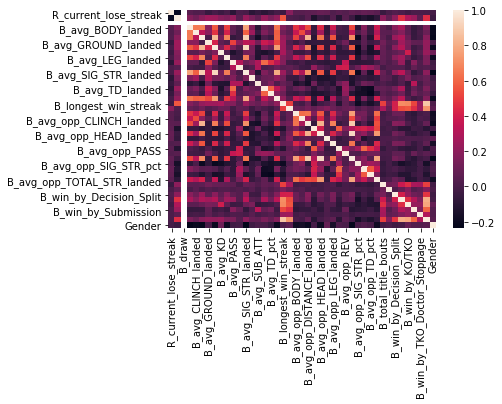

In [41]:
#correlation matrix and heat map 
import seaborn as sns
corrMatrix = combine_male_female_df_new.corr()
print (corrMatrix)
ax = sns.heatmap(corrMatrix)


In [42]:

def split_fighter_datasets(predictor, target):

    #Split arrays or matrices into random train and test subsets
    X = combine_male_female_df_new[predictor]
    y = combine_male_female_df_new[target]
    fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test = train_test_split(X, y, test_size = 0.6, random_state=42)
    return fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test

In [43]:
combine_male_female_df_new.head()

,B_fighter,weight_class,R_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_landed,B_avg_CLINCH_landed,B_avg_DISTANCE_landed,B_avg_GROUND_landed,B_avg_HEAD_landed,...,B_avg_opp_TOTAL_STR_landed,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,Gender
0,Marlon Moraes,Bantamweight,0.0,4.0,0.0,6.000000,0.000000,20.600000,2.000000,11.200000,...,19.200000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,2
2,Donald Cerrone,Lightweight,0.0,3.0,0.0,11.322581,4.387097,38.580645,3.806452,23.258065,...,49.774194,1.0,0.0,0.0,7.0,10.0,6.0,0.0,23.0,2
3,Petr Yan,Bantamweight,1.0,4.0,0.0,14.000000,11.000000,48.750000,10.500000,53.750000,...,34.250000,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0,2
4,Blagoy Ivanov,Heavyweight,1.0,1.0,0.0,14.500000,2.000000,59.500000,0.000000,45.000000,...,90.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
6,Pedro Munhoz,Bantamweight,0.0,3.0,0.0,7.416667,3.416667,34.666667,3.416667,24.000000,...,46.500000,0.0,0.0,0.0,2.0,3.0,3.0,0.0,8.0,2


In [44]:
#Looking at wins against average body strikes landed 
#In general, looking at wins-- which attribute is most effective towards winning
#I have a theory it's takedowns 


In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import datasets, linear_model
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
def split_fighter_datasets(predictor, target):

    #Split arrays or matrices into random train and test subsets
    X = combine_male_female_df_new[predictor]
    y = combine_male_female_df_new[target]
    fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test = train_test_split(X, y, test_size = 0.6, random_state=42)
    return fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test

In [47]:
predictor=['B_avg_BODY_landed']
target='B_current_win_streak'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target)

In [48]:
regr = linear_model.LinearRegression()

Coefficients: 
 [0.2536284]
Mean squared error: 1.42
Coefficient of determination: 0.08
Variance Score: 0.08


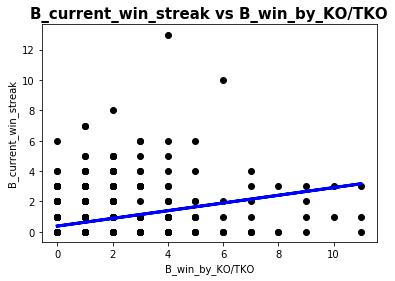

In [51]:
def calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test):
    # Train the model using the training sets
    regr.fit(fighter_X_train,fighter_y_train)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(fighter_y_test, regr.predict(fighter_X_test)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(fighter_y_test, regr.predict(fighter_X_test)))

    print ('Variance Score: %.2f' % regr.score(fighter_X_test, fighter_y_test))

    # Plot outputs
    plt.scatter(fighter_X_test, fighter_y_test,  color='black')
    plt.plot(fighter_X_test, regr.predict(fighter_X_test), color='blue', linewidth=3)
    plt.xlabel(predictor[0])
    plt.ylabel(target)
    plt.title(target + " vs " + predictor[0], fontsize=15, fontweight='bold')

    plt.show()
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

In [50]:
predictor=['B_win_by_KO/TKO']
target='B_current_win_streak'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target)

In [ ]:
def calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test):
    # Train the model using the training sets
    regr.fit(fighter_X_train,fighter_y_train)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(fighter_y_test, regr.predict(fighter_X_test)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(fighter_y_test, regr.predict(fighter_X_test)))

    print ('Variance Score: %.2f' % regr.score(fighter_X_test, fighter_y_test))

    # Plot outputs
    plt.scatter(fighter_X_test, fighter_y_test,  color='black')
    plt.plot(fighter_X_test, regr.predict(fighter_X_test), color='blue', linewidth=3)
    pl.xlabel(predictor[0])
    pl.ylabel(target)
    plt.title(target + " vs " + predictor[0], fontsize=15, fontweight='bold')

    plt.show()
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

In [89]:
#we made an algorithm that pairwise was pitted against wins. And then here are the average mean square, 
#coef of determine
#variance score 
#we can use the idea of calculate_and_plot_fighter_linear_regression


In [ ]:
def pairsStats(data):

  
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

